In [1]:
# Warning Libraries :
import warnings
warnings.filterwarnings("ignore")

# Scientific and Data Manipulation Libraries :
import pandas as pd
import numpy as np
import math
import gc
import os

# ML Libraries :
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.tree                     import DecisionTreeClassifier
from sklearn.ensemble                 import VotingClassifier, RandomForestClassifier
from sklearn.metrics                  import f1_score, confusion_matrix, classification_report

# Boosting Algorithms :
#from xgboost                          import XGBClassifier
#from catboost                         import CatBoostClassifier
#from lightgbm                         import LGBMClassifier

# Data Visualization Libraries :
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

# read

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

# Look at the head() of the data

display('Train Head :',train.head(10))
display('Test Head :',test.head(10))

'Train Head :'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
5,17388,495,3247,5,2011-11-27 12:52:00,1.65,15351.0,35
6,18494,165,3377,1,2011-12-08 20:01:00,1.25,12748.0,35
7,17109,2597,3435,1,2011-11-23 12:40:00,1.25,16255.0,35
8,17143,1945,2352,1,2011-11-23 14:07:00,5.75,17841.0,35
9,8422,3311,2502,6,2011-06-22 10:11:00,2.95,13849.0,35


'Test Head :'

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
5,8348,1817,697,48,2011-06-20 13:27:00,12432.0,24
6,17034,262,3147,18,2011-11-22 16:26:00,13985.0,35
7,3701,1323,2000,7,2011-03-08 17:23:00,14507.0,35
8,16983,2327,1121,6,2011-11-22 12:52:00,15150.0,35
9,14396,2216,1912,4,2011-10-20 13:24:00,14911.0,10


In [4]:

def details_data(data):
    print("Column Information for .")
    print( data.info())
    for col in data.columns:
        print( "No of unique value in ",data[col].name )
        print(data[col].nunique())
        print(data[col].sort_values().unique())
    print(data.describe())
details_data(train)
 

Column Information for .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB
None
No of unique value in  InvoiceNo
20971
[    0     1     2 ..., 22186 22187 22188]
No of unique value in  StockCode
3619
[   0    1    2 ..., 3681 3682 3683]
No of unique value in  Description
3819
[   0    1    2 ..., 3893 3894 3895]
No of unique value in  Quantity
373
[-80995 -74215  -1930  -1350  -1300  -1296  -1200   -960   -840   -828
   -756   -720   -670   -624   -600   -576   -500   -480   -432   -420
   -400   -360   -334   -324   -300   -288   -252   -250   -244   -240
   -234   -22

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]
           InvoiceNo      StockCode    Description       Quantity  \
count  284780.000000  284780.000000  284780.000000  284780.000000   
mean     9955.394083    1573.386807    2023.955573      12.028468   
std      5551.519138     843.604991    1089.812078     295.111588   
min         0.000000       0.000000       0.000000  -80995.000000   
25%      5069.000000     939.000000    1141.000000       2.000000   
50%     10310.000000    1521.000000    1987.000000       5.000000   
75%     14657.000000    2106.000000    2945.000000      12.000000   
max     22188.000000    3683.000000    3895.000000   80995.000000   

           UnitPrice     CustomerID        Country  
count  284780.000000  284780.000000  284780.000000  
mean        3.451216   15288.224278      32.823846  
std        78.399541    1714.336529       6.743602  
min         0.000000   12346.000000       0.000000  

In [5]:
details_data(test)

Column Information for .
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122049 entries, 0 to 122048
Data columns (total 7 columns):
InvoiceNo      122049 non-null int64
StockCode      122049 non-null int64
Description    122049 non-null int64
Quantity       122049 non-null int64
InvoiceDate    122049 non-null object
CustomerID     122049 non-null float64
Country        122049 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB
None
No of unique value in  InvoiceNo
18204
[    0     1     2 ..., 22176 22183 22189]
No of unique value in  StockCode
3410
[   0    1    2 ..., 3680 3681 3683]
No of unique value in  Description
3563
[   0    1    2 ..., 3893 3894 3895]
No of unique value in  Quantity
274
[-9360 -3114 -2000 -1515 -1296  -720  -701  -576  -480  -468  -408  -318
  -312  -300  -276  -250  -240  -200  -192  -180  -160  -150  -144  -140
  -132  -130  -126  -121  -120  -108  -100   -96   -82   -80   -79   -76
   -72   -70   -67   -60   -58   -53   -52   -5

# EDA

In [6]:
sns.heatmap(train.corr(), annot = True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


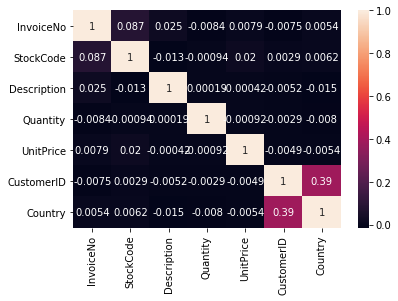

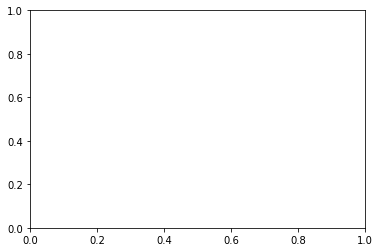

In [8]:
plot_col=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate'
       , 'CustomerID', 'Country'  ]

In [ ]:
train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# Check for null

In [ ]:
display(train.isnull().sum())
print(test.isnull().sum())

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in train:
    if plotnumber<=4 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(train[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

In [ ]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
train['price']=train['Quantity']*train['UnitPrice']

In [ ]:
train['Time'] = pd.to_datetime(train['InvoiceDate']).dt.time
train['Date'] =   pd.to_datetime(train['InvoiceDate']).dt.date

In [ ]:

train['Day']  = train['Date'].map(lambda x: x.day)
train['Month']  = train['Date'].map(lambda x: x.month)
train['Year']  = train['Date'].map(lambda x: x.year)
#train['Hour'], train['Minute'],train['Second']= train['Time'].split(':')

In [ ]:
s= train[train['Quantity']<0 ]['StockCode']
list(s)

In [ ]:
train[train['StockCode'].isin(s)].sort_values(by=['InvoiceDate','StockCode','CustomerID'])
train[train['CustomerID']==17850]

In [ ]:
#Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'],
train.groupby(by=['InvoiceNo','InvoiceDate','Country'])['price'].sum()